### Name: Liangfan Pang          CWID: 10453333

### step 1: read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

In [9]:
#from __future__ import print_function
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

In [10]:
def get_Titanic_data():
    """Get the Titanic data"""
    df = pd.read_csv("Titanic.csv", index_col=0)
    with open("Titanic.csv", 'w') as f:
        df.to_csv(f)

    return df

df = get_Titanic_data()

train_data, test_data = train_test_split(df, test_size=0.3)

print("* train_data.head()", train_data.head(), sep="\n", end="\n\n")
print("* train_data.tail()", train_data.tail(), sep="\n", end="\n\n")
print("* test_data.head()", test_data.head(), sep="\n", end="\n\n")
print("* test_data.tail()", test_data.tail(), sep="\n", end="\n\n")

* train_data.head()
     pclass  survived                           name     sex   age  sibsp  \
300     1st         0       Uruchurtu, Don. Manuel E    male  40.0      0   
610     3rd         0                Adams, Mr. John    male  26.0      0   
421     2nd         0    Giles, Mr. Frederick Edward    male  21.0      1   
191     1st         1  Longley, Miss. Gretchen Fiske  female  21.0      0   
1025    3rd         0        Moen, Mr. Sigurd Hansen    male  25.0      0   

      parch    ticket       fare  cabin     embarked boat   body  \
300       0  PC 17601  27.720800    NaN    Cherbourg  NaN    NaN   
610       0    341826   8.050000    NaN  Southampton  NaN  103.0   
421       0     28134  11.500000    NaN  Southampton  NaN    NaN   
191       0     13502  77.958298     D9  Southampton   10    NaN   
1025      0    348123   7.650000  F G73  Southampton  NaN  309.0   

                  home.dest  
300     Mexico City, Mexico  
610    Bournemouth, England  
421   Cornwall / C

### Step 2: fit a decision tree model using independent variables ‘pclass + sex + age + sibsp’ and dependent variable ‘survived’. Plot the full tree. Make sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code. 

In [11]:
X_train=train_data [['pclass', 'age', 'sex', 'sibsp']]
y_train=train_data['survived']
X_test=test_data [['pclass', 'age', 'sex', 'sibsp']]
y_test=test_data['survived']

X_train['age'].fillna(X_train['age'].mean(), inplace=True)
X_test['age'].fillna(X_test['age'].mean(), inplace=True)

from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False)

X_train = vec.fit_transform(X_train.to_dict(orient='record'))
X_test = vec.transform(X_test.to_dict(orient='record'))

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_predict = dtc.predict(X_test)

In [25]:
import pydotplus as pdp
import graphviz

def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=None,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
        
visualize_tree(dtc, ['pclass', 'age', 'sex', 'sibsp',0,0,0])
(graph,) = pdp.graph_from_dot_file('dt.dot')
graph.write_png('dt.png')


^
Expected {'graph' | 'digraph'} (at char 0), (line:1, col:1)


TypeError: cannot unpack non-iterable NoneType object

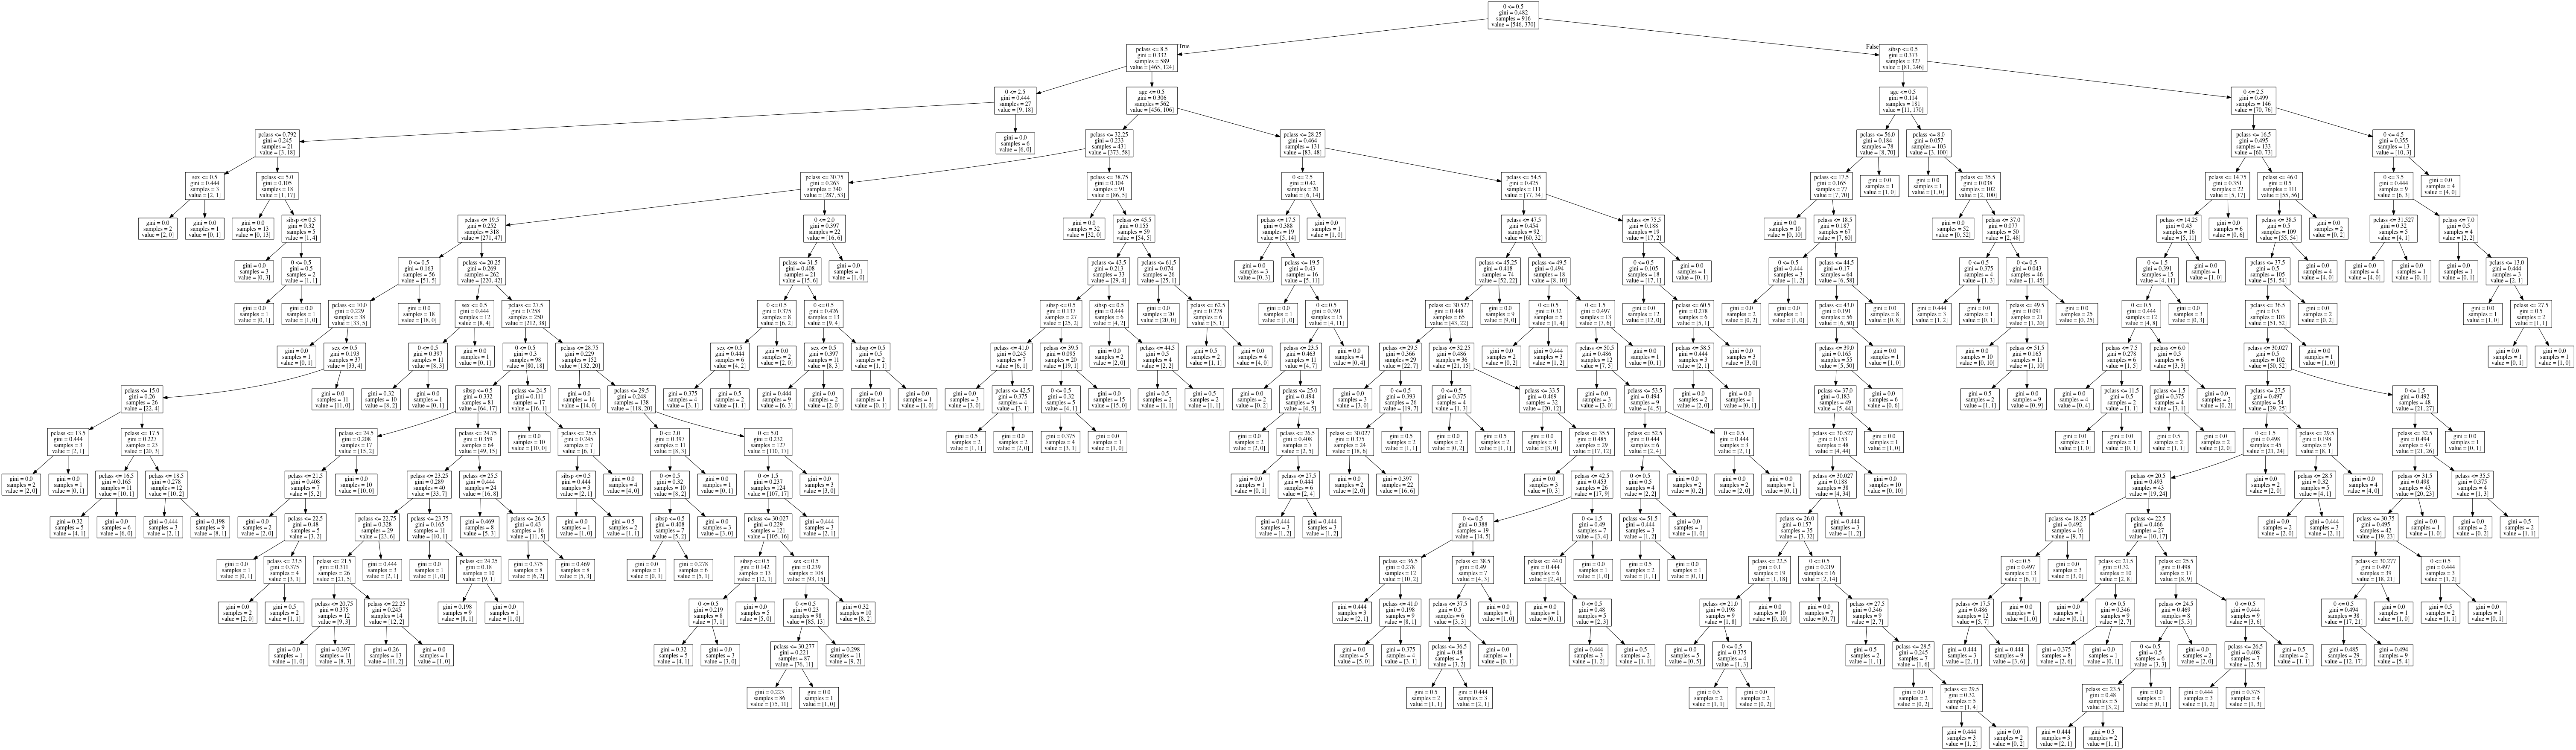

In [27]:
from IPython.display import Image
Image(filename = '/Users/Lotus/Desktop/stevens/CPE695/homework/HW3/HW3-F19-part2/dt.png')

### Step 3: print out the performance measures of the full model: in‐sample and out-of‐ sample accuracy, defined as following:in‐sample percent survivors correctly predicted (on training set)/ in-sample percent fatalities correctly predicted (on training set)/ out‐of‐sample percent survivors correctly predicted (on test set)/ out-of‐sample percent fatalities correctly predicted (on test set)

In [29]:
from sklearn.metrics import classification_report
print(dtc.score(X_test, y_test))
print(classification_report(y_predict, y_test, target_names = ['died', 'survived']))

0.7531806615776081
              precision    recall  f1-score   support

        died       0.86      0.79      0.82       284
    survived       0.55      0.65      0.59       109

    accuracy                           0.75       393
   macro avg       0.70      0.72      0.71       393
weighted avg       0.77      0.75      0.76       393



### Step 4: use cross‐validation to find the best parameter to prune the tree. You should be able to plot a graph with the ‘tree size’ as the x-axis and ‘number of misclassification’ as the Y-axis. Find the minimum number of misclassification and choose the corresponding tree size to prune the tree.

In [65]:
from __future__ import print_function

import os
import subprocess

from time import time
from operator import itemgetter
from scipy.stats import randint

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals import joblib

//anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = joblib.load('output/CART.pkl')
trained_target = clf.predict(test_data)

print confusion_matrix(test_target, trained_target, labels=[0, 1, 2, 3, 4])
print classification_report(test_target, trained_target)

SyntaxError: invalid syntax (<ipython-input-73-3155682ae006>, line 7)

In [72]:
test_data_set = dataset[T_len:len(dataset)]
test_data_target = datatarget[T_len:len(dataset)]
test_feature_set = test_data_set[:, fea_index]

clf = joblib.load('output/CART.pkl')
test_trained_target = clf.predict(test_feature_set)

print confusion_matrix(test_data_target, test_trained_target, labels=[0, 1, 2, 3, 4])
print classification_report(test_data_target, test_trained_target)

SyntaxError: invalid syntax (<ipython-input-72-0258a0cb0572>, line 8)

### Step 5: prune the tree with the optimal tree size. Plot the pruned tree.

### Step 6: For the final pruned tree, report its in‐sample and out‐of‐sample accuracy, defined as: in‐sample percent survivors correctly predicted (on training set)/ in‐sample percent fatalities correctly predicted (on training set)/ out‐of‐sample percent survivors correctly predicted (on test set)/ out‐of‐sample percent fatalities correctly predicted (on test set) Check whether there is improvement in out‐of‐sample for the full tree (bigger model) and the pruned tree (smaller model).

In [63]:
from sklearn.metrics import classification_report
print(dtc.score(X_test, y_test))
print(classification_report(y_predict, y_test, target_names = ['died', 'survived']))

0.7531806615776081
              precision    recall  f1-score   support

        died       0.86      0.79      0.82       284
    survived       0.55      0.65      0.59       109

    accuracy                           0.75       393
   macro avg       0.70      0.72      0.71       393
weighted avg       0.77      0.75      0.76       393

